In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/Users/a/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/a/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
PATH = '/Users/a/Desktop/lab/house_price/data/city24_processed.csv'
PREDICTED_PATH = '/Users/a/Desktop/lab/house_price/data/predicted_data.csv'

In [3]:
raw_df = pd.read_csv(PATH)
raw_df.drop('Unnamed: 0', axis=1, inplace=True)
raw_df['id'] = raw_df.index
raw_df.set_index('id', inplace=True)
raw_df


,address,hind,üldpind,ehitusaasta,rõdu,seisukord,tubade_arv,Haabersti,Kadriorg,Kesklinn,...,energy_class_a,energy_class_b,energy_class_c,energy_class_d,energy_class_e,energy_class_f,energy_class_g,korrus,saun,bassein
id,,,,,,,,,,,,,,,,,,,,,
0,Ao tn 2,649800,148.3,2018,1,1,4,0,0,1,...,0,1,0,0,0,0,0,5,1,0
1,Ravi tn 14,190000,154.2,2004,1,3,5,0,0,1,...,0,0,0,1,0,0,0,4,1,0
2,Pärnu mnt 69,75000,14.9,1911,0,2,1,0,0,1,...,0,1,0,0,0,0,0,2,0,0
3,Jakobi tn 15,77900,36.9,1960,0,2,1,0,0,1,...,0,0,0,0,0,1,0,2,0,0
4,Narva mnt 9,165000,76.0,1958,0,2,3,0,0,1,...,0,1,0,0,0,0,0,5,0,0
5,Tartu mnt 52,209900,79.5,2017,1,1,3,0,0,1,...,0,1,0,0,0,0,0,5,0,0
6,Tina 13,125000,64.6,1963,1,2,3,0,0,1,...,0,0,0,1,0,0,0,1,0,0
7,Pärnu mnt 69,119000,39.2,1911,0,2,2,0,0,1,...,0,1,0,0,0,0,0,2,0,0
8,Vesivärava tn 50,269500,105.4,2019,1,1,4,0,0,1,...,0,1,0,0,0,0,0,9,0,0


In [4]:
df = raw_df.copy()



df.shape


(2160, 46)

Feature Processing

1.Cleaning outlier features

In [5]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df['hind'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.06525682]
 [-1.00765851]
 [-0.95614784]
 [-0.95414093]
 [-0.95414093]
 [-0.95347196]
 [-0.95280299]
 [-0.95146505]
 [-0.95079608]
 [-0.95079608]]

outer range (high) of the distribution:
[[ 4.04640856]
 [ 4.21365102]
 [ 4.81572387]
 [ 5.28400275]
 [ 5.55159068]
 [ 6.22056051]
 [ 7.55850018]
 [15.58613815]
 [15.58613815]
 [15.58613815]]


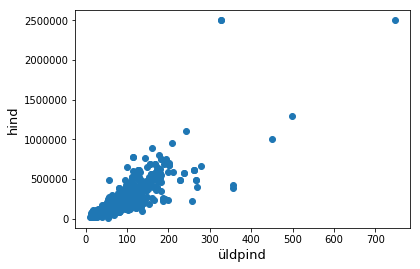

In [6]:
fig, ax = plt.subplots()
ax.scatter(x = df['üldpind'], y = df['hind'])
plt.ylabel('hind', fontsize=13)
plt.xlabel('üldpind', fontsize=13)
plt.show()

We can see at the bottom right two with extremely large 'üldpind' that are of a low price and some at the top right with high price. These values are huge oultliers because they concern to the utility area or some luxary segment. Therefore, we can safely delete them.

In [7]:
df = df.drop(df[(df['üldpind']>500)].index)
df = df.drop(df[df['hind']>1500000].index)


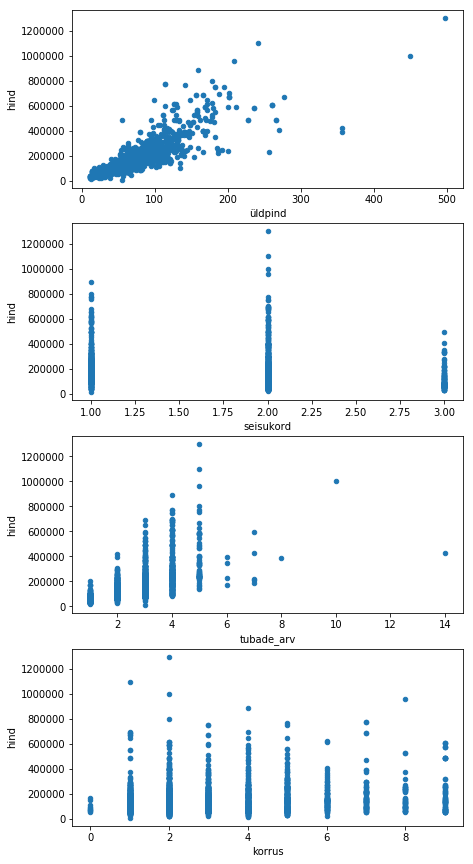

In [8]:
# make a plot to see how continuous features contribute the price
fig = plt.figure(figsize=(7,15))
ax1 = fig.add_subplot(4, 1, 1)
ax2 = fig.add_subplot(4, 1, 2)
ax3 = fig.add_subplot(4, 1, 3)
ax4 = fig.add_subplot(4, 1, 4)

df.plot(x="üldpind", y="hind", ax=ax1, kind="scatter")
df.plot(x="seisukord", y="hind", ax=ax2, kind="scatter")
df.plot(x="tubade_arv", y="hind", ax=ax3, kind="scatter")
df.plot(x="korrus", y="hind", ax=ax4, kind="scatter")

plt.show()

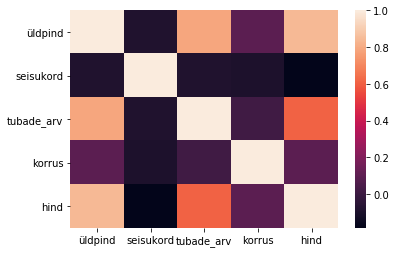

In [9]:
# correlation matrix of continous values
correlation_matrix = df[['üldpind', 'seisukord', 'tubade_arv', 'korrus', 'hind']].corr()
sns.heatmap(correlation_matrix)

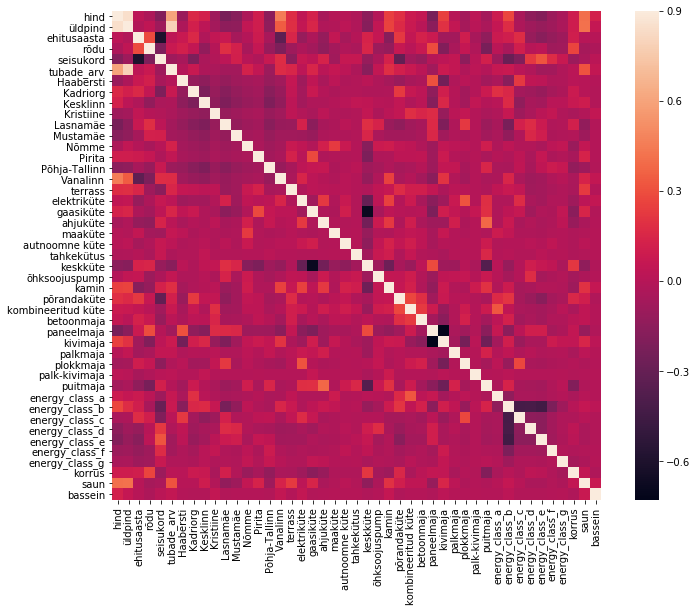

In [10]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

2.Analyzing the price


In [11]:
df['hind'].describe()


count    2.157000e+03
mean     1.668880e+05
std      1.217497e+05
min      1.089000e+04
25%      8.700000e+04
50%      1.390000e+05
75%      2.054700e+05
max      1.300000e+06
Name: hind, dtype: float64


 mu = 166887.96 and sigma = 121721.50



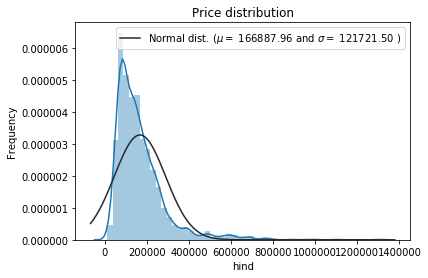

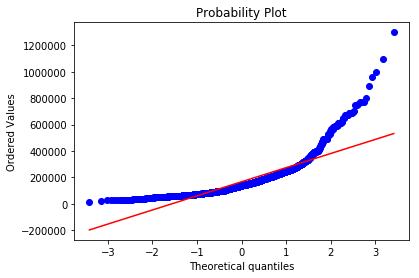

In [12]:
# lets analyze the price
sns.distplot(df['hind'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['hind'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['hind'], plot=plt)
plt.show()

In [13]:
#skewness and kurtosis
print("Skewness: %f" % df['hind'].skew())
print("Kurtosis: %f" % df['hind'].kurt())


Skewness: 2.663439
Kurtosis: 11.416486


Ok, 'hind' is not normal. It shows peakedness, positive skewness and does not follow the diagonal line.
The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.

Log-transformation of the target variable


 mu = 11.83 and sigma = 0.62



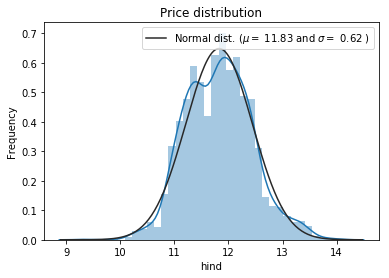

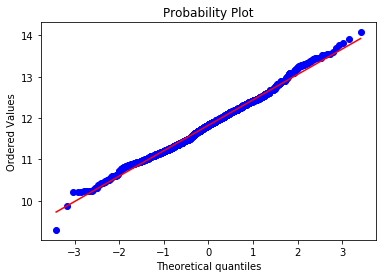

In [14]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["hind"] = np.log1p(df["hind"])

#Check the new distribution 
sns.distplot(df["hind"] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df["hind"])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df["hind"], plot=plt)
plt.show()

The skew seems now corrected and the data appears more normally distributed.



In [15]:
df.columns

Index(['address', 'hind', 'üldpind', 'ehitusaasta', 'rõdu', 'seisukord',
       'tubade_arv', 'Haabersti', 'Kadriorg', 'Kesklinn', 'Kristiine',
       'Lasnamäe', 'Mustamäe', 'Nõmme', 'Pirita', 'Põhja-Tallinn', 'Vanalinn',
       'terrass', 'elektriküte', 'gaasiküte', 'ahjuküte', 'maaküte',
       'autnoomne küte', 'tahkekütus', 'keskküte', 'õhksoojuspump', 'kamin',
       'põrandaküte', 'kombineeritud küte', 'betoonmaja', 'paneelmaja',
       'kivimaja', 'palkmaja', 'plokkmaja', 'palk-kivimaja', 'puitmaja',
       'energy_class_a', 'energy_class_b', 'energy_class_c', 'energy_class_d',
       'energy_class_e', 'energy_class_f', 'energy_class_g', 'korrus', 'saun',
       'bassein'],
      dtype='object')

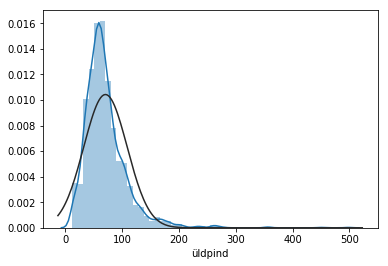

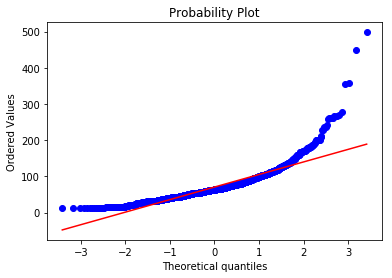

In [16]:
#histogram and normal probability plot
sns.distplot(df['üldpind'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['üldpind'], plot=plt)

In [17]:
#data transformation
df['üldpind'] = np.log(df['üldpind'])

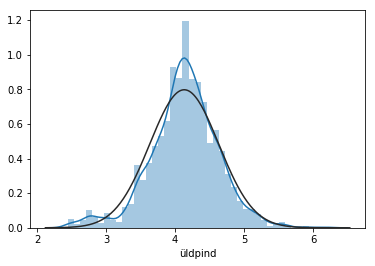

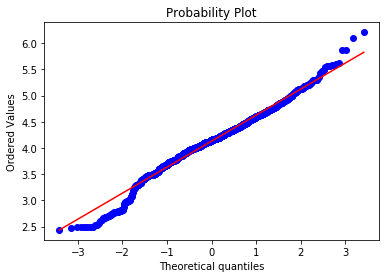

In [18]:
#transformed histogram and normal probability plot
sns.distplot(df['üldpind'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['üldpind'], plot=plt)

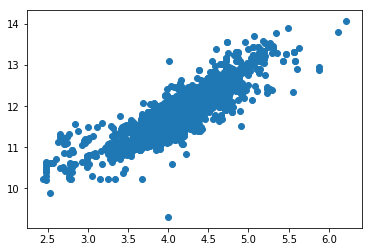

In [19]:
#scatter plot
plt.scatter(df['üldpind'], df['hind']);

In [20]:
# make build year categorical
build_year = pd.get_dummies(df['ehitusaasta'], prefix='ehitusaasta')
df = pd.concat([df, build_year], axis=1)
df.drop(['ehitusaasta'], axis=1, inplace=True)


In [21]:
# drop address column as it can not be proccesed in model
df = df.drop(['address'], axis=1)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

def train_and_test(df, k=0):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop(["hind"])
    lr = LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        lr.fit(train[features], train["hind"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["hind"], predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    if k == 1:
        # Randomize *all* rows from `df` and return
        shuffled_df = df.sample(frac=1, )
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["hind"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["hind"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["hind"])
        predictions_two = lr.predict(train[features])        

        mse_two = mean_squared_error(train["hind"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])

        return avg_rmse
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train["hind"])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test["hind"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse

    
num_folds = [3, 4, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]

for fold in num_folds:
    rmse = train_and_test(df, k=fold)
    print(str(fold), "folds: ", "avg RMSE: ", str(rmse))


3 folds:  avg RMSE:  0.19797412899084046
4 folds:  avg RMSE:  0.1976979315814958
5 folds:  avg RMSE:  0.19586245615390988
7 folds:  avg RMSE:  0.1970342916244006
9 folds:  avg RMSE:  0.19394636658511943
10 folds:  avg RMSE:  0.19345301668792295
11 folds:  avg RMSE:  0.19313204747698565
13 folds:  avg RMSE:  0.1928295804167783
15 folds:  avg RMSE:  0.1922036786993345
17 folds:  avg RMSE:  41547778.0643829
19 folds:  avg RMSE:  0.19187507763383282
21 folds:  avg RMSE:  0.1926191758845406
23 folds:  avg RMSE:  0.1929199950929852


In [23]:
# Train and test data are in the 50/50 proportions and no shuffle
rmse = train_and_test(df, k=0)
print("Train and test data are in the 50/50 proportions ", "avg RMSE: ", str(rmse))
# Train and test data are in the 50/50 proportions and shuffle data
rmse = train_and_test(df, k=1)
print("Train and test data are in the 50/50 proportions and shuffle data", "avg RMSE: ", str(rmse))
# lets pick fold number of average rmse value
# in our case 5
rmse = train_and_test(df, k=5)
print(str(5), "folds: ", "avg RMSE: ", str(rmse))

Train and test data are in the 50/50 proportions  avg RMSE:  0.2017446300151415
Train and test data are in the 50/50 proportions and shuffle data avg RMSE:  0.2668876055020097
5 folds:  avg RMSE:  0.19743335787350969


In [24]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split  


# https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

In [46]:
df.columns

Index(['hind', 'üldpind', 'rõdu', 'seisukord', 'tubade_arv', 'Haabersti',
       'Kadriorg', 'Kesklinn', 'Kristiine', 'Lasnamäe',
       ...
       'ehitusaasta_2010', 'ehitusaasta_2011', 'ehitusaasta_2012',
       'ehitusaasta_2013', 'ehitusaasta_2014', 'ehitusaasta_2015',
       'ehitusaasta_2016', 'ehitusaasta_2017', 'ehitusaasta_2018',
       'ehitusaasta_2019'],
      dtype='object', length=158)

In [50]:
df.dtypes[35:]

energy_class_b      int64
energy_class_c      int64
energy_class_d      int64
energy_class_e      int64
energy_class_f      int64
energy_class_g      int64
korrus              int64
saun                int64
bassein             int64
ehitusaasta_1700    uint8
ehitusaasta_1710    uint8
ehitusaasta_1800    uint8
ehitusaasta_1820    uint8
ehitusaasta_1825    uint8
ehitusaasta_1840    uint8
ehitusaasta_1850    uint8
ehitusaasta_1881    uint8
ehitusaasta_1901    uint8
ehitusaasta_1902    uint8
ehitusaasta_1903    uint8
ehitusaasta_1904    uint8
ehitusaasta_1905    uint8
ehitusaasta_1907    uint8
ehitusaasta_1908    uint8
ehitusaasta_1909    uint8
ehitusaasta_1910    uint8
ehitusaasta_1911    uint8
ehitusaasta_1912    uint8
ehitusaasta_1913    uint8
ehitusaasta_1915    uint8
                    ...  
ehitusaasta_1988    uint8
ehitusaasta_1989    uint8
ehitusaasta_1990    uint8
ehitusaasta_1991    uint8
ehitusaasta_1992    uint8
ehitusaasta_1993    uint8
ehitusaasta_1995    uint8
ehitusaasta_

In [26]:
# split data into train and test data using sclearn library in proportion 80/20
x = np.array(df.drop(['hind'], axis=1))
y = np.array(df['hind'])
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

train_size  = int(df.shape[0]*0.8)

train_id = df.loc[:train_size].index
test_id = df.loc[train_size:].index

X_train = df.loc[:train_size].drop(['hind'], axis=1).values
y_train = df.loc[:train_size]['hind'].values
X_test = df.loc[train_size:].drop(['hind'], axis=1).values
y_test = df.loc[train_size:]['hind'].values


In [27]:
X_test[0]


array([4.0181832, 1.       , 1.       , 2.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       1.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 1.       , 0.       , 0.       ,
       0.       , 0.       , 1.       , 0.       , 1.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 1.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 3.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 

In [28]:
model_rmse_table_cols = ['model_name','score_mean', 'score_standard_deviation']
model_rmse_table = pd.DataFrame(columns=model_rmse_table_cols)

In [29]:
# Choosing average validation function that we have got earlier
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def rmsle_cv_custom_data(model, train_x, train_y):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_x)
    rmse= np.sqrt(-cross_val_score(model, train_x, train_y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def add_score_to_table(name, score):
    row = pd.DataFrame([[name, score.mean(), score.std()]], columns=model_rmse_table_cols)
    model_rmse_table = model_rmse_table.append(row, ignore_index=True)

In [30]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

score = rmsle_cv(lasso)
#add_score_to_table('Lasso', score)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



Lasso score: 0.2163 (0.0447)



In [31]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

score = rmsle_cv(ENet)
#add_score_to_table('ElasticNet', score)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


ElasticNet score: 0.2164 (0.0448)



In [32]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

score = rmsle_cv(KRR)
#add_score_to_table('Kernel Ridge', score)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Kernel Ridge score: 0.2426 (0.0803)



In [33]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

score = rmsle_cv(GBoost)
#add_score_to_table('Gradient Boosting', score)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Gradient Boosting score: 0.2362 (0.0785)



In [34]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

score = rmsle_cv(model_xgb)
#add_score_to_table('Xgboost', score)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Xgboost score: 0.2360 (0.0520)



In [35]:
#model_rmse_table

In [36]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)


In [37]:
from model_classes.StackingAveragedModel import StackingAveragedModels
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.2208 (0.0629)


In [38]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [39]:
stacked_averaged_models.fit(X_train, y_train)
stacked_train_pred = stacked_averaged_models.predict(X_train)
stacked_test_pred = stacked_averaged_models.predict(X_test)
stacked_pred = np.expm1(stacked_test_pred)
print("RMSLE on train " + str(rmsle(y_train, stacked_train_pred)))
print("RMSLE on test " + str(rmsle(y_test, stacked_test_pred)))

RMSLE on train 0.15002422830656373
RMSLE on test 0.21263337945855645


In [40]:
model_xgb.fit(X_train, y_train)
xgb_train_pred = model_xgb.predict(X_train)
xgb_test_pred = model_xgb.predict(X_test)
xgb_pred = np.expm1(xgb_test_pred)
print("RMSLE on train " + str(rmsle(y_train, xgb_train_pred)))
print("RMSLE on test " + str(rmsle(y_test, xgb_test_pred)))

RMSLE on train 0.13086171797535284
RMSLE on test 0.21260820163567468


In [41]:
''''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.3 ))

print('RMSLE score on test data:')
print(rmsle(y_test,stacked_test_pred*0.70 +
               xgb_test_pred*0.3 ))

RMSLE score on train data:
0.14158102323782842
RMSLE score on test data:
0.21078747752899157


In [42]:
ensemble = stacked_pred*0.70 + xgb_pred*0.3


In [43]:

result = raw_df.loc[test_id]
result['predicted'] = ensemble
pred = result['predicted']
result.drop(labels=['predicted'], axis=1,inplace = True)
result.insert(loc=0, column='predicted', value=pred)
hind = result['hind']
result.drop(labels=['hind'], axis=1,inplace = True)
result.insert(0, 'hind', hind)

result.to_csv(PREDICTED_PATH, encoding='utf-8')
result


,hind,predicted,address,üldpind,ehitusaasta,rõdu,seisukord,tubade_arv,Haabersti,Kadriorg,...,energy_class_a,energy_class_b,energy_class_c,energy_class_d,energy_class_e,energy_class_f,energy_class_g,korrus,saun,bassein
id,,,,,,,,,,,,,,,,,,,,,
1725,144190,139997.427339,Kolde pst 72,55.6,2018,1,1,2,0,0,...,0,1,0,0,0,0,0,3,0,0
1726,149190,150279.227438,Kolde pst 72,57.4,2018,1,1,2,0,0,...,0,1,0,0,0,0,0,5,0,0
1727,170190,187872.347064,Kolde pst 72,69.9,2018,1,1,3,0,0,...,0,1,0,0,0,0,0,5,0,0
1728,104190,117457.914545,Kolde pst 72,44.3,2018,1,1,1,0,0,...,0,1,0,0,0,0,0,5,0,0
1729,149190,144570.168048,Kolde pst 72,55.4,2018,1,1,2,0,0,...,0,1,0,0,0,0,0,6,0,0
1730,102990,109553.968293,Kolde pst 72,42.9,2018,1,1,1,0,0,...,0,1,0,0,0,0,0,3,0,0
1731,144190,183916.625705,Kolde pst 72,68.8,2018,1,1,3,0,0,...,0,1,0,0,0,0,0,1,0,0
1732,150190,142440.376088,Kolde pst 72,54.3,2018,1,1,2,0,0,...,0,1,0,0,0,0,0,6,0,0
1733,105190,117078.397196,Kolde pst 72,44.5,2018,1,1,1,0,0,...,0,1,0,0,0,0,0,6,0,0


In [44]:
from sklearn.externals import joblib
MODEL_PATH = '/Users/a/Desktop/lab/house_price/house_price_api/house_price_vue/models/'

# save models to disk
filename = MODEL_PATH + 'stacked_model.pkl'
joblib.dump(stacked_averaged_models, filename)

filename = MODEL_PATH + 'xgb_model.pkl'
joblib.dump(model_xgb, filename)

pd.read_csv()





['/Users/a/Desktop/lab/house_price/house_price_api/house_price_vue/models/xgb_model.pkl']

In [67]:
raw_df.loc[5]

address               Tartu mnt 52
hind                        209900
üldpind                       79.5
ehitusaasta                   2017
rõdu                             1
seisukord                        1
tubade_arv                       3
Haabersti                        0
Kadriorg                         0
Kesklinn                         1
Kristiine                        0
Lasnamäe                         0
Mustamäe                         0
Nõmme                            0
Pirita                           0
Põhja-Tallinn                    0
Vanalinn                         0
terrass                          0
elektriküte                      0
gaasiküte                        0
ahjuküte                         0
maaküte                          0
autnoomne küte                   0
tahkekütus                       0
keskküte                         0
õhksoojuspump                    0
kamin                            0
põrandaküte                      1
kombineeritud küte  